## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


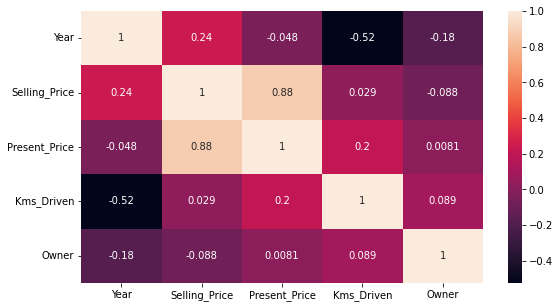

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2022-df.Year

In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


## Train test split

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [15]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [16]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.59,27000,2.0,0.0,1.0,0,8
1,9.54,43000,1.0,0.0,1.0,0,9
2,9.85,6900,2.0,0.0,1.0,0,5
3,4.15,5200,2.0,0.0,1.0,0,11
4,6.87,42450,1.0,0.0,1.0,0,8


In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Adaboost Regressor

In [20]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# regressionda cok fazla dallanma oldugu icin max_depth= 3

In [21]:
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [22]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [23]:
train_val(ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.975889,0.706366
mae,0.645033,0.924021
mse,0.717107,2.821475
rmse,0.846822,1.679725


In [101]:
1.67/ df.Selling_Price.mean()

0.35826948433769257

In [102]:
0.84/ df.Selling_Price.mean()

0.18020740529560586

In [24]:
y_pred_ada = ada_model.predict(X_test)
y_pred_ada

array([ 0.9873913 ,  6.15697368,  7.0575    ,  7.93      ,  0.92166667,
        5.01726027,  5.28438356,  6.95916667,  0.9873913 ,  7.0575    ,
        5.01726027,  1.10228571,  0.92166667,  3.84214286,  7.08928571,
        4.792     ,  5.01726027,  0.9873913 ,  4.792     , 11.27453333,
        5.01726027,  2.82      ,  6.95916667,  7.93      ,  0.92166667,
        5.78590909,  0.9873913 ,  4.792     ,  5.65561798,  5.01726027,
        3.825     ,  8.1854386 ,  0.92166667, 11.58682171,  5.00882353,
        0.92166667,  3.82014925,  0.92166667,  5.06083333,  3.84214286,
        0.9873913 ,  5.01726027,  6.62606742, 13.24375   ,  0.9873913 ,
        5.06083333,  0.92166667, 11.05313953,  5.00882353, 10.06104651,
        5.01726027,  1.448     ,  5.78590909,  0.92166667,  5.65561798,
        5.06083333,  0.9873913 ,  0.92166667,  5.95454545, 10.06104651,
        0.92166667])

In [25]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.831288
test_neg_mean_absolute_error       -1.036693
test_neg_mean_squared_error        -4.211793
test_neg_root_mean_squared_error   -1.787556
dtype: float64

In [26]:
from sklearn.tree import plot_tree

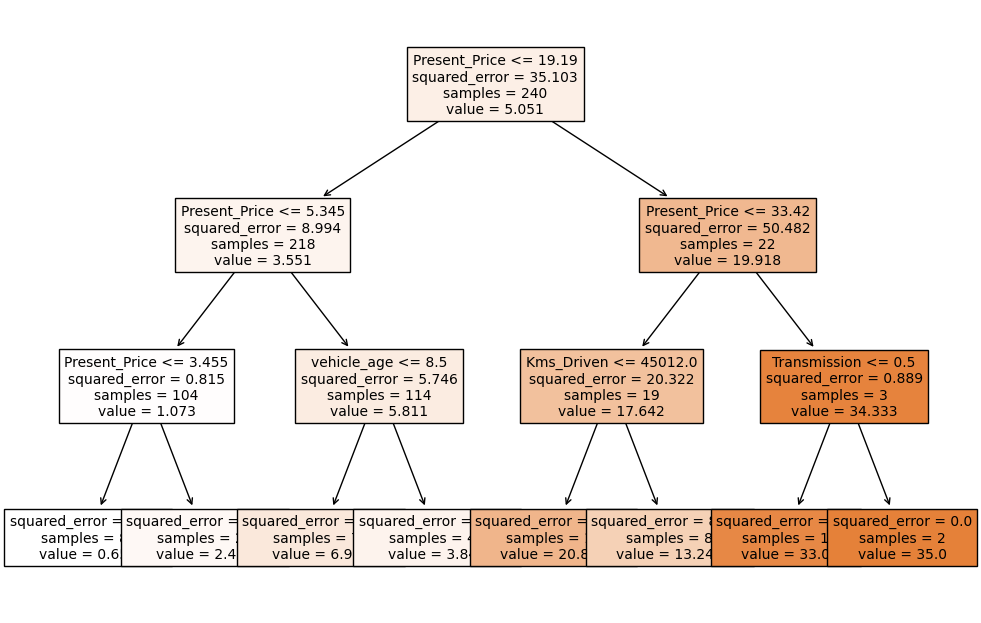

In [27]:
model = AdaBoostRegressor(random_state=101, n_estimators=3, learning_rate=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = list(X.columns)
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

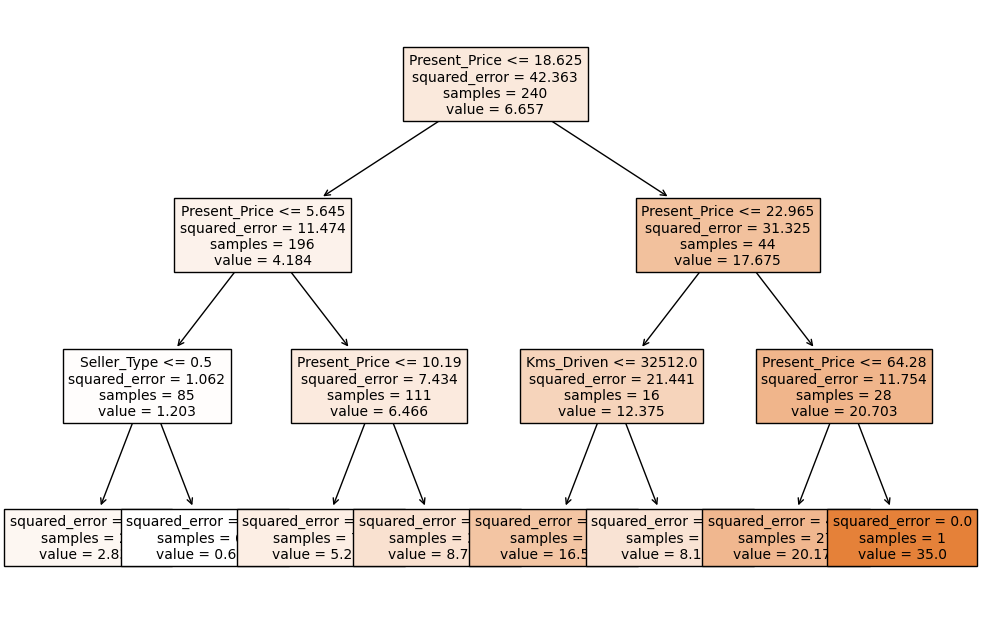

In [28]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

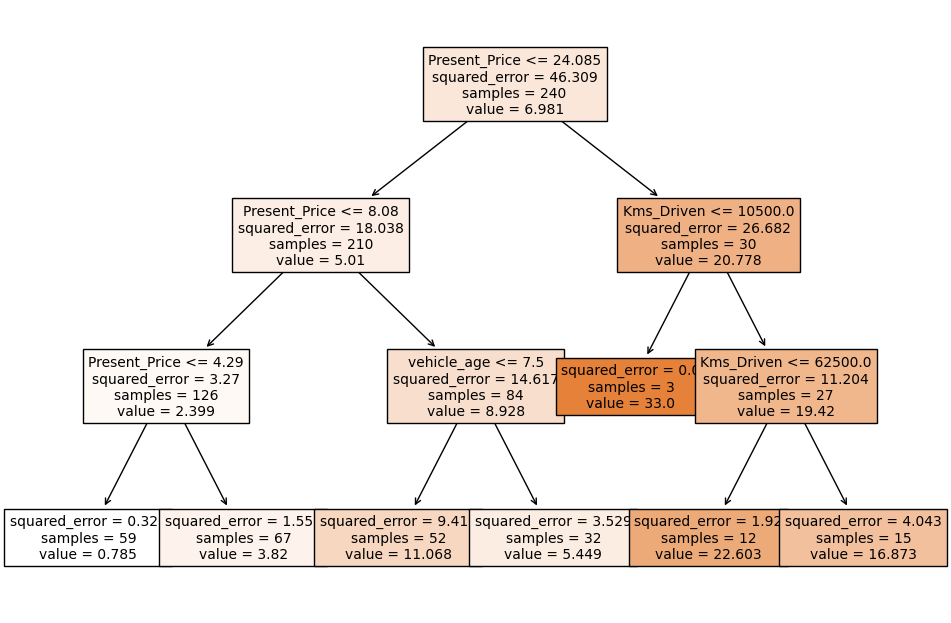

In [29]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

In [ ]:
# squared_error hangi agacta en düsükse o agaci döndürür
# yaptigi isilem en düsük variance i tespit etmek

In [30]:
y_pred

array([ 0.66671875,  5.4490625 ,  6.95916667,  8.73710526,  0.66671875,
        5.28438356,  5.28438356,  6.95916667,  0.66671875,  6.95916667,
        5.28438356,  0.66671875,  0.66671875,  5.28438356,  8.1875    ,
        5.28438356,  5.28438356,  0.66671875,  3.84214286,  8.73710526,
        5.28438356,  2.4625    ,  6.95916667,  8.73710526,  0.66671875,
        5.28438356,  0.66671875,  5.28438356,  5.28438356,  5.28438356,
        3.84214286,  6.95916667,  0.66671875,  8.73710526,  5.28438356,
        0.66671875,  3.84214286,  0.66671875,  5.28438356,  3.84214286,
        0.66671875,  5.28438356,  5.4490625 , 13.24375   ,  0.66671875,
        5.28438356,  0.66671875,  8.73710526,  5.28438356,  8.73710526,
        5.28438356,  0.66671875,  5.4490625 ,  0.66671875,  5.28438356,
        5.28438356,  0.66671875,  0.66671875,  5.28438356,  8.73710526,
        0.66671875])

In [31]:
np.array(y_test)

array([ 0.35,  7.2 ,  7.5 ,  7.25,  0.2 ,  5.4 ,  5.95,  7.4 ,  0.55,
        9.25,  4.8 ,  1.  ,  0.2 ,  3.  ,  5.25,  4.75,  4.6 ,  0.6 ,
        2.65,  9.15,  4.4 ,  2.55,  6.  ,  7.75,  0.5 ,  5.65,  0.4 ,
        3.65,  6.1 ,  4.5 ,  2.25, 11.25,  0.5 , 11.25,  5.3 ,  0.5 ,
        2.9 ,  0.12,  4.95,  2.25,  0.8 ,  5.5 ,  7.05,  2.5 ,  0.48,
        4.5 ,  0.1 ,  9.7 ,  3.95,  8.55,  4.75,  1.1 ,  4.9 ,  0.2 ,
        5.8 ,  4.75,  0.4 ,  0.35,  4.75,  8.4 ,  0.2 ])

In [32]:
 #X_test

In [33]:
X_test.loc[176]

Present_Price        1.05
Kms_Driven       30000.00
Fuel_Type            2.00
Seller_Type          1.00
Transmission         1.00
Owner                0.00
vehicle_age         11.00
Name: 176, dtype: float64

## Gridsearch for Adaboosting

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]
            }

In [36]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [37]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [38]:
grid_model.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 500}

In [39]:
grid_model.best_estimator_

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=500,
                  random_state=101)

In [40]:
grid_model.best_score_

-1.6810079999745373

In [41]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.974385,0.667491
mae,0.705125,0.917945
mse,0.761849,3.195019
rmse,0.872840,1.787462


In [ ]:
# 

## Feature importance

In [42]:
model = AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=500,
                  random_state=101)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=500,
                  random_state=101)

In [43]:
model.feature_importances_

array([0.82563085, 0.03630614, 0.02148452, 0.00090225, 0.00685471,
       0.        , 0.10882153])

In [44]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.825631
vehicle_age,0.108822
Kms_Driven,0.036306
Fuel_Type,0.021485
Transmission,0.006855
Seller_Type,0.000902
Owner,0.000000


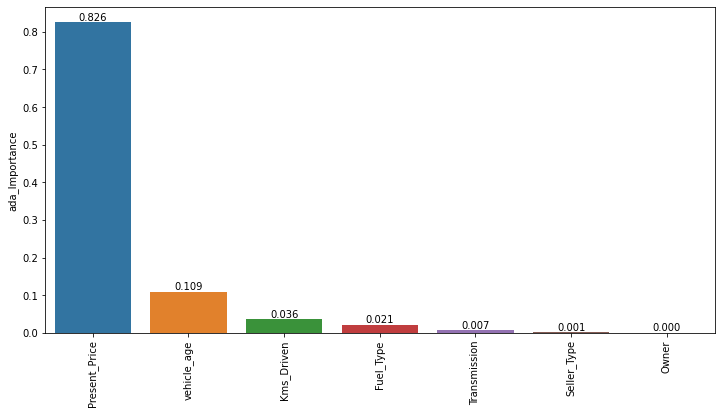

In [45]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
grad_model = GradientBoostingRegressor(random_state=101)

In [48]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

# baslangic degerim fiyatlarin ortalamsidir.

In [49]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [50]:
train_val(grad_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996963,0.901226
mae,0.215896,0.545832
mse,0.090340,0.949101
rmse,0.300567,0.974218


In [51]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.891796
test_neg_mean_absolute_error       -0.700283
test_neg_mean_squared_error        -3.466463
test_neg_root_mean_squared_error   -1.477805
dtype: float64

## Gridsearch for Gradientboosting

In [52]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [53]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [54]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [55]:
grid_model.best_params_

{'learning_rate': 0.5,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 100,
 'subsample': 0.8}

In [56]:
grid_model.best_estimator_

GradientBoostingRegressor(learning_rate=0.5, random_state=101, subsample=0.8)

In [57]:
grid_model.best_score_

-1.263741499309313

In [58]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999875,0.819713
mae,0.047711,0.755676
mse,0.003705,1.732342
rmse,0.060869,1.316184


In [59]:
model = GradientBoostingRegressor(learning_rate=0.5, random_state=101, subsample=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.920121
test_neg_mean_absolute_error       -0.683925
test_neg_mean_squared_error        -2.075140
test_neg_root_mean_squared_error   -1.263741
dtype: float64

## Feature importance

In [60]:
model = GradientBoostingRegressor(learning_rate=0.5, random_state=101, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, random_state=101, subsample=0.8)

In [61]:
model.feature_importances_

array([8.99996914e-01, 2.80962233e-02, 6.15040596e-03, 3.84186654e-04,
       5.17640638e-04, 1.94536132e-05, 6.48351760e-02])

In [62]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['grad_Importance'])
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.899997
vehicle_age,0.064835
Kms_Driven,0.028096
Fuel_Type,0.006150
Transmission,0.000518
Seller_Type,0.000384
Owner,0.000019


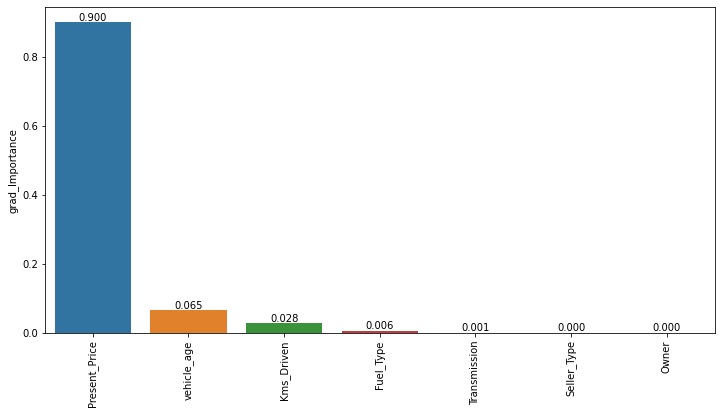

In [63]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## XG Boost Regressor

In [103]:
#!pip install --upgrade pip

In [104]:
#!pip install xgboost

In [112]:
import xgboost as xgb

xgb.__version__

'1.6.0'

In [114]:
xgb.__version__

'1.6.0'

In [105]:
from xgboost import XGBRegressor

In [106]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror")  #objective="reg:squarederror" uyari vermesin diye böyle yazildi

In [107]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [108]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.997454,0.813215
mae,0.105885,0.683895
mse,0.075719,1.794785
rmse,0.275171,1.339696


In [109]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.908255
test_neg_mean_absolute_error       -0.673897
test_neg_mean_squared_error        -2.146928
test_neg_root_mean_squared_error   -1.282678
dtype: float64

## Gridsearch for XGBoost

In [71]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [72]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [73]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [116]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [117]:
grid_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [76]:
grid_model.best_score_

-1.01817648091118

In [115]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996658,0.888035
mae,0.187046,0.616600
mse,0.099400,1.075848
rmse,0.315278,1.037231


## Feature importance

In [78]:
model = XGBRegressor(n_estimators=500, objective='reg:squarederror', random_state=101,
             subsample=0.5)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [79]:
model.feature_importances_

array([0.6497108 , 0.03349382, 0.04444677, 0.01659315, 0.01156086,
       0.00413866, 0.24005596], dtype=float32)

In [80]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.649711
vehicle_age,0.240056
Fuel_Type,0.044447
Kms_Driven,0.033494
Seller_Type,0.016593
Transmission,0.011561
Owner,0.004139


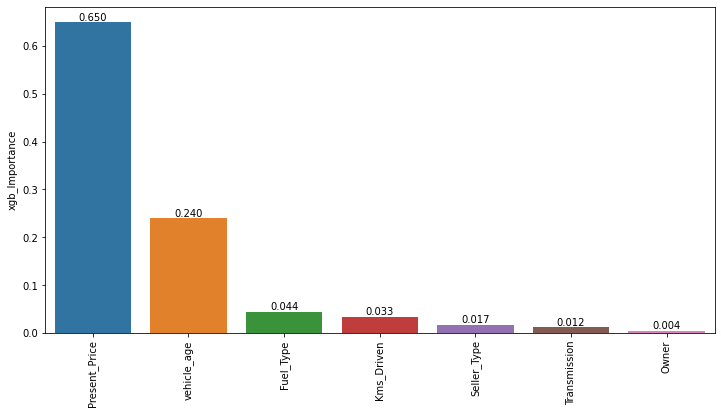

In [81]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [82]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_Importance,grad_Importance,xgb_Importance
Present_Price,0.825631,0.899997,0.649711
vehicle_age,0.108822,0.064835,0.240056
Kms_Driven,0.036306,0.028096,0.033494
Fuel_Type,0.021485,0.006150,0.044447
Transmission,0.006855,0.000518,0.011561
Seller_Type,0.000902,0.000384,0.016593
Owner,0.000000,0.000019,0.004139


## Feature Selection

In [118]:
X_new = df[["vehicle_age",  "Present_Price"]]
X_new.head()

,vehicle_age,Present_Price
0,8,5.59
1,9,9.54
2,5,9.85
3,11,4.15
4,8,6.87


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [120]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [121]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [122]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.997454,0.813215
mae,0.105885,0.683895
mse,0.075719,1.794785
rmse,0.275171,1.339696


In [123]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.908255
test_neg_mean_absolute_error       -0.673897
test_neg_mean_squared_error        -2.146928
test_neg_root_mean_squared_error   -1.282678
dtype: float64

## Gridsearch for new XGBoost model

In [124]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [125]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [126]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [127]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [128]:
grid_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [129]:
grid_model.best_score_

-1.094681645458151

In [130]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996658,0.888035
mae,0.187046,0.616600
mse,0.099400,1.075848
rmse,0.315278,1.037231


## Final Model

In [96]:
X_new.head()

,vehicle_age,Present_Price
0,8,5.59
1,9,9.54
2,5,9.85
3,11,4.15
4,8,6.87


In [97]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [98]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OrdinalEncoder(), []), remainder="passthrough")

In [99]:
pd.DataFrame(column_trans.fit_transform(X_new)).head()

,0,1
0,8.0,5.59
1,9.0,9.54
2,5.0,9.85
3,11.0,4.15
4,8.0,6.87


In [136]:
from sklearn.pipeline import Pipeline
operations = [("transformer", column_trans), ("RF", XGBRegressor(colsample_bytree= 1,
 learning_rate= 0.1,
 max_depth = 3,
 n_estimators = 500,
 subsample = 0.5))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_new, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(), [])])),
                ('RF',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=3, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
     

## Prediction

In [137]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [138]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [139]:
pipe_model.predict(df_samples)

array([5.7687197, 4.8675294], dtype=float32)